In [1]:
import torch

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [3]:
def model(t_u, w ,b):
    return w * t_u + b

In [4]:
def loss_fn(t_p, t_c):
    squared_diff = (t_p - t_c)**2
    return squared_diff.mean()

In [6]:
w = torch.ones(())
b = torch.zeros(())

In [7]:
t_p = model(t_u, w, b)

In [8]:
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [9]:
loss = loss_fn(t_p, t_c)

In [10]:
loss

tensor(1763.8848)

In [11]:
delta = 0.1

In [12]:
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b),t_c) - 
                        loss_fn(model(t_u, w - delta, b),t_c)) / (2.0 * delta)

In [13]:
learning_rate = 1e-2

In [14]:
w = w - learning_rate * loss_rate_of_change_w

In [15]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta),t_c) - 
                        loss_fn(model(t_u, w, b - delta),t_c)) / (2.0 * delta)

In [16]:
b = b - learning_rate * loss_rate_of_change_b

In [17]:
def dloss_fn(t_p, t_c):
    dsq_diff = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diff

In [18]:
def dmodel_dw(t_u, w, b):
    return t_u

In [19]:
def dmodel_db(t_u, w, b):
    return 1.0

In [20]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [21]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w,b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        print("Epoch {0}, Loss {1}".format(epoch, float(loss)))
    return params

In [22]:
training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]),
             t_u = t_u, t_c = t_c)

Epoch 1, Loss 1763.884765625
Epoch 2, Loss 5802484.5
Epoch 3, Loss 19408029696.0
Epoch 4, Loss 64915905708032.0
Epoch 5, Loss 2.1713052546105344e+17
Epoch 6, Loss 7.262575831529281e+20
Epoch 7, Loss 2.429183416467663e+24
Epoch 8, Loss 8.125122549611731e+27
Epoch 9, Loss 2.717688212084259e+31
Epoch 10, Loss 9.090110518901907e+34
Epoch 11, Loss inf
Epoch 12, Loss inf
Epoch 13, Loss inf
Epoch 14, Loss inf
Epoch 15, Loss inf
Epoch 16, Loss inf
Epoch 17, Loss inf
Epoch 18, Loss inf
Epoch 19, Loss inf
Epoch 20, Loss inf
Epoch 21, Loss inf
Epoch 22, Loss inf
Epoch 23, Loss nan
Epoch 24, Loss nan
Epoch 25, Loss nan
Epoch 26, Loss nan
Epoch 27, Loss nan
Epoch 28, Loss nan
Epoch 29, Loss nan
Epoch 30, Loss nan
Epoch 31, Loss nan
Epoch 32, Loss nan
Epoch 33, Loss nan
Epoch 34, Loss nan
Epoch 35, Loss nan
Epoch 36, Loss nan
Epoch 37, Loss nan
Epoch 38, Loss nan
Epoch 39, Loss nan
Epoch 40, Loss nan
Epoch 41, Loss nan
Epoch 42, Loss nan
Epoch 43, Loss nan
Epoch 44, Loss nan
Epoch 45, Loss nan
Epoch

tensor([nan, nan])

In [23]:
training_loop(n_epochs = 100, learning_rate = 1e-4, params = torch.tensor([1.0, 0.0]),
             t_u = t_u, t_c = t_c)

Epoch 1, Loss 1763.884765625
Epoch 2, Loss 323.09051513671875
Epoch 3, Loss 78.92963409423828
Epoch 4, Loss 37.5528450012207
Epoch 5, Loss 30.540283203125
Epoch 6, Loss 29.351154327392578
Epoch 7, Loss 29.148883819580078
Epoch 8, Loss 29.113847732543945
Epoch 9, Loss 29.107145309448242
Epoch 10, Loss 29.105247497558594
Epoch 11, Loss 29.104167938232422
Epoch 12, Loss 29.103221893310547
Epoch 13, Loss 29.102294921875
Epoch 14, Loss 29.10137939453125
Epoch 15, Loss 29.100465774536133
Epoch 16, Loss 29.09954833984375
Epoch 17, Loss 29.098630905151367
Epoch 18, Loss 29.09771728515625
Epoch 19, Loss 29.0967960357666
Epoch 20, Loss 29.09588050842285
Epoch 21, Loss 29.094959259033203
Epoch 22, Loss 29.09404945373535
Epoch 23, Loss 29.0931339263916
Epoch 24, Loss 29.09221649169922
Epoch 25, Loss 29.09130096435547
Epoch 26, Loss 29.09038543701172
Epoch 27, Loss 29.08946418762207
Epoch 28, Loss 29.088550567626953
Epoch 29, Loss 29.087635040283203
Epoch 30, Loss 29.086713790893555
Epoch 31, Loss 

tensor([ 0.2327, -0.0438])

In [24]:
t_un = t_u * 0.1

In [25]:
training_loop(n_epochs = 100, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]),
             t_u = t_un, t_c = t_c)

Epoch 1, Loss 80.36434173583984
Epoch 2, Loss 37.574913024902344
Epoch 3, Loss 30.871076583862305
Epoch 4, Loss 29.756193161010742
Epoch 5, Loss 29.507152557373047
Epoch 6, Loss 29.3924560546875
Epoch 7, Loss 29.298828125
Epoch 8, Loss 29.208717346191406
Epoch 9, Loss 29.119415283203125
Epoch 10, Loss 29.030488967895508
Epoch 11, Loss 28.941877365112305
Epoch 12, Loss 28.853565216064453
Epoch 13, Loss 28.765552520751953
Epoch 14, Loss 28.6778507232666
Epoch 15, Loss 28.590431213378906
Epoch 16, Loss 28.503318786621094
Epoch 17, Loss 28.4164981842041
Epoch 18, Loss 28.329973220825195
Epoch 19, Loss 28.243741989135742
Epoch 20, Loss 28.157804489135742
Epoch 21, Loss 28.07215118408203
Epoch 22, Loss 27.986797332763672
Epoch 23, Loss 27.9017276763916
Epoch 24, Loss 27.81694984436035
Epoch 25, Loss 27.732463836669922
Epoch 26, Loss 27.648256301879883
Epoch 27, Loss 27.56434440612793
Epoch 28, Loss 27.4807071685791
Epoch 29, Loss 27.397361755371094
Epoch 30, Loss 27.314294815063477
Epoch 31,

tensor([ 2.7553, -2.5162])

In [29]:
params = training_loop(n_epochs = 5000, learning_rate = 1e-2, params = torch.tensor([1.0, 0.0]),
             t_u = t_un, t_c = t_c)

Epoch 1, Loss 80.36434173583984
Epoch 2, Loss 37.574913024902344
Epoch 3, Loss 30.871076583862305
Epoch 4, Loss 29.756193161010742
Epoch 5, Loss 29.507152557373047
Epoch 6, Loss 29.3924560546875
Epoch 7, Loss 29.298828125
Epoch 8, Loss 29.208717346191406
Epoch 9, Loss 29.119415283203125
Epoch 10, Loss 29.030488967895508
Epoch 11, Loss 28.941877365112305
Epoch 12, Loss 28.853565216064453
Epoch 13, Loss 28.765552520751953
Epoch 14, Loss 28.6778507232666
Epoch 15, Loss 28.590431213378906
Epoch 16, Loss 28.503318786621094
Epoch 17, Loss 28.4164981842041
Epoch 18, Loss 28.329973220825195
Epoch 19, Loss 28.243741989135742
Epoch 20, Loss 28.157804489135742
Epoch 21, Loss 28.07215118408203
Epoch 22, Loss 27.986797332763672
Epoch 23, Loss 27.9017276763916
Epoch 24, Loss 27.81694984436035
Epoch 25, Loss 27.732463836669922
Epoch 26, Loss 27.648256301879883
Epoch 27, Loss 27.56434440612793
Epoch 28, Loss 27.4807071685791
Epoch 29, Loss 27.397361755371094
Epoch 30, Loss 27.314294815063477
Epoch 31,

Epoch 348, Loss 11.198220252990723
Epoch 349, Loss 11.170149803161621
Epoch 350, Loss 11.142169952392578
Epoch 351, Loss 11.11428165435791
Epoch 352, Loss 11.086490631103516
Epoch 353, Loss 11.058796882629395
Epoch 354, Loss 11.031192779541016
Epoch 355, Loss 11.00368595123291
Epoch 356, Loss 10.976269721984863
Epoch 357, Loss 10.94894790649414
Epoch 358, Loss 10.92171859741211
Epoch 359, Loss 10.894580841064453
Epoch 360, Loss 10.867536544799805
Epoch 361, Loss 10.840582847595215
Epoch 362, Loss 10.813720703125
Epoch 363, Loss 10.78695011138916
Epoch 364, Loss 10.760270118713379
Epoch 365, Loss 10.733680725097656
Epoch 366, Loss 10.707183837890625
Epoch 367, Loss 10.680774688720703
Epoch 368, Loss 10.654454231262207
Epoch 369, Loss 10.628225326538086
Epoch 370, Loss 10.602086067199707
Epoch 371, Loss 10.576033592224121
Epoch 372, Loss 10.550070762634277
Epoch 373, Loss 10.52419376373291
Epoch 374, Loss 10.498409271240234
Epoch 375, Loss 10.47270679473877
Epoch 376, Loss 10.44709300994

Epoch 681, Loss 5.593070983886719
Epoch 682, Loss 5.584022045135498
Epoch 683, Loss 5.575005054473877
Epoch 684, Loss 5.566019058227539
Epoch 685, Loss 5.557063102722168
Epoch 686, Loss 5.548136234283447
Epoch 687, Loss 5.539241313934326
Epoch 688, Loss 5.530376434326172
Epoch 689, Loss 5.521539688110352
Epoch 690, Loss 5.5127339363098145
Epoch 691, Loss 5.503957748413086
Epoch 692, Loss 5.495211601257324
Epoch 693, Loss 5.4864959716796875
Epoch 694, Loss 5.477807998657227
Epoch 695, Loss 5.469152450561523
Epoch 696, Loss 5.460525035858154
Epoch 697, Loss 5.451927661895752
Epoch 698, Loss 5.443358421325684
Epoch 699, Loss 5.434819221496582
Epoch 700, Loss 5.426309108734131
Epoch 701, Loss 5.4178266525268555
Epoch 702, Loss 5.409372329711914
Epoch 703, Loss 5.400949478149414
Epoch 704, Loss 5.392550468444824
Epoch 705, Loss 5.38418436050415
Epoch 706, Loss 5.3758463859558105
Epoch 707, Loss 5.367536544799805
Epoch 708, Loss 5.359253406524658
Epoch 709, Loss 5.350998878479004
Epoch 710, 

Epoch 961, Loss 3.9562947750091553
Epoch 962, Loss 3.952801465988159
Epoch 963, Loss 3.9493227005004883
Epoch 964, Loss 3.945855140686035
Epoch 965, Loss 3.9423980712890625
Epoch 966, Loss 3.9389536380767822
Epoch 967, Loss 3.9355204105377197
Epoch 968, Loss 3.932095527648926
Epoch 969, Loss 3.9286880493164062
Epoch 970, Loss 3.9252915382385254
Epoch 971, Loss 3.921905517578125
Epoch 972, Loss 3.918527364730835
Epoch 973, Loss 3.915165901184082
Epoch 974, Loss 3.9118154048919678
Epoch 975, Loss 3.9084739685058594
Epoch 976, Loss 3.9051434993743896
Epoch 977, Loss 3.901824712753296
Epoch 978, Loss 3.898517370223999
Epoch 979, Loss 3.895221710205078
Epoch 980, Loss 3.891935110092163
Epoch 981, Loss 3.8886640071868896
Epoch 982, Loss 3.8854005336761475
Epoch 983, Loss 3.882150411605835
Epoch 984, Loss 3.8789103031158447
Epoch 985, Loss 3.875680446624756
Epoch 986, Loss 3.8724632263183594
Epoch 987, Loss 3.869255781173706
Epoch 988, Loss 3.866060495376587
Epoch 989, Loss 3.862872362136841


Epoch 1275, Loss 3.2812840938568115
Epoch 1276, Loss 3.2800850868225098
Epoch 1277, Loss 3.278887987136841
Epoch 1278, Loss 3.277696132659912
Epoch 1279, Loss 3.276506185531616
Epoch 1280, Loss 3.275322198867798
Epoch 1281, Loss 3.274141550064087
Epoch 1282, Loss 3.272967576980591
Epoch 1283, Loss 3.2717931270599365
Epoch 1284, Loss 3.270625114440918
Epoch 1285, Loss 3.269460439682007
Epoch 1286, Loss 3.268301248550415
Epoch 1287, Loss 3.267143487930298
Epoch 1288, Loss 3.265991449356079
Epoch 1289, Loss 3.2648420333862305
Epoch 1290, Loss 3.263699531555176
Epoch 1291, Loss 3.2625558376312256
Epoch 1292, Loss 3.2614214420318604
Epoch 1293, Loss 3.260287284851074
Epoch 1294, Loss 3.259160041809082
Epoch 1295, Loss 3.258033037185669
Epoch 1296, Loss 3.256911516189575
Epoch 1297, Loss 3.255795478820801
Epoch 1298, Loss 3.254680871963501
Epoch 1299, Loss 3.2535688877105713
Epoch 1300, Loss 3.2524619102478027
Epoch 1301, Loss 3.251361608505249
Epoch 1302, Loss 3.2502634525299072
Epoch 1303,

Epoch 1612, Loss 3.040076971054077
Epoch 1613, Loss 3.0396950244903564
Epoch 1614, Loss 3.039314031600952
Epoch 1615, Loss 3.038933753967285
Epoch 1616, Loss 3.0385565757751465
Epoch 1617, Loss 3.0381813049316406
Epoch 1618, Loss 3.0378053188323975
Epoch 1619, Loss 3.0374319553375244
Epoch 1620, Loss 3.0370588302612305
Epoch 1621, Loss 3.036688804626465
Epoch 1622, Loss 3.036318778991699
Epoch 1623, Loss 3.0359489917755127
Epoch 1624, Loss 3.0355825424194336
Epoch 1625, Loss 3.0352156162261963
Epoch 1626, Loss 3.0348494052886963
Epoch 1627, Loss 3.03448486328125
Epoch 1628, Loss 3.0341227054595947
Epoch 1629, Loss 3.033762216567993
Epoch 1630, Loss 3.0334017276763916
Epoch 1631, Loss 3.033041477203369
Epoch 1632, Loss 3.0326850414276123
Epoch 1633, Loss 3.0323286056518555
Epoch 1634, Loss 3.031973361968994
Epoch 1635, Loss 3.0316193103790283
Epoch 1636, Loss 3.0312652587890625
Epoch 1637, Loss 3.0309133529663086
Epoch 1638, Loss 3.030564308166504
Epoch 1639, Loss 3.030214548110962
Epoc

Epoch 1848, Loss 2.9780385494232178
Epoch 1849, Loss 2.9778671264648438
Epoch 1850, Loss 2.977696180343628
Epoch 1851, Loss 2.977527379989624
Epoch 1852, Loss 2.9773573875427246
Epoch 1853, Loss 2.9771883487701416
Epoch 1854, Loss 2.977020502090454
Epoch 1855, Loss 2.976853370666504
Epoch 1856, Loss 2.976686716079712
Epoch 1857, Loss 2.9765195846557617
Epoch 1858, Loss 2.976353645324707
Epoch 1859, Loss 2.976189374923706
Epoch 1860, Loss 2.9760231971740723
Epoch 1861, Loss 2.9758596420288086
Epoch 1862, Loss 2.975696563720703
Epoch 1863, Loss 2.9755325317382812
Epoch 1864, Loss 2.9753692150115967
Epoch 1865, Loss 2.975208282470703
Epoch 1866, Loss 2.975045919418335
Epoch 1867, Loss 2.9748857021331787
Epoch 1868, Loss 2.974724769592285
Epoch 1869, Loss 2.974565029144287
Epoch 1870, Loss 2.9744057655334473
Epoch 1871, Loss 2.974247694015503
Epoch 1872, Loss 2.974088191986084
Epoch 1873, Loss 2.9739303588867188
Epoch 1874, Loss 2.973775625228882
Epoch 1875, Loss 2.973618268966675
Epoch 18

Epoch 2187, Loss 2.9435575008392334
Epoch 2188, Loss 2.9435033798217773
Epoch 2189, Loss 2.943450689315796
Epoch 2190, Loss 2.9433951377868652
Epoch 2191, Loss 2.943342685699463
Epoch 2192, Loss 2.9432904720306396
Epoch 2193, Loss 2.943234920501709
Epoch 2194, Loss 2.943183183670044
Epoch 2195, Loss 2.9431302547454834
Epoch 2196, Loss 2.9430794715881348
Epoch 2197, Loss 2.943026542663574
Epoch 2198, Loss 2.9429733753204346
Epoch 2199, Loss 2.9429221153259277
Epoch 2200, Loss 2.9428696632385254
Epoch 2201, Loss 2.9428184032440186
Epoch 2202, Loss 2.942765712738037
Epoch 2203, Loss 2.9427144527435303
Epoch 2204, Loss 2.942664861679077
Epoch 2205, Loss 2.942612409591675
Epoch 2206, Loss 2.942563533782959
Epoch 2207, Loss 2.9425103664398193
Epoch 2208, Loss 2.9424614906311035
Epoch 2209, Loss 2.942411184310913
Epoch 2210, Loss 2.9423606395721436
Epoch 2211, Loss 2.942310333251953
Epoch 2212, Loss 2.942260503768921
Epoch 2213, Loss 2.942211389541626
Epoch 2214, Loss 2.9421615600585938
Epoch

Epoch 2546, Loss 2.932340383529663
Epoch 2547, Loss 2.9323244094848633
Epoch 2548, Loss 2.932309627532959
Epoch 2549, Loss 2.9322926998138428
Epoch 2550, Loss 2.9322774410247803
Epoch 2551, Loss 2.9322614669799805
Epoch 2552, Loss 2.9322457313537598
Epoch 2553, Loss 2.9322290420532227
Epoch 2554, Loss 2.9322149753570557
Epoch 2555, Loss 2.9321978092193604
Epoch 2556, Loss 2.932183265686035
Epoch 2557, Loss 2.9321672916412354
Epoch 2558, Loss 2.9321532249450684
Epoch 2559, Loss 2.9321374893188477
Epoch 2560, Loss 2.932121515274048
Epoch 2561, Loss 2.932107448577881
Epoch 2562, Loss 2.9320924282073975
Epoch 2563, Loss 2.9320764541625977
Epoch 2564, Loss 2.932061195373535
Epoch 2565, Loss 2.9320473670959473
Epoch 2566, Loss 2.9320311546325684
Epoch 2567, Loss 2.9320173263549805
Epoch 2568, Loss 2.932002305984497
Epoch 2569, Loss 2.931986093521118
Epoch 2570, Loss 2.9319722652435303
Epoch 2571, Loss 2.931957483291626
Epoch 2572, Loss 2.931941270828247
Epoch 2573, Loss 2.931929111480713
Epo

Epoch 2816, Loss 2.929520606994629
Epoch 2817, Loss 2.929513454437256
Epoch 2818, Loss 2.929507255554199
Epoch 2819, Loss 2.9295005798339844
Epoch 2820, Loss 2.9294958114624023
Epoch 2821, Loss 2.9294893741607666
Epoch 2822, Loss 2.9294822216033936
Epoch 2823, Loss 2.9294755458831787
Epoch 2824, Loss 2.929471015930176
Epoch 2825, Loss 2.9294631481170654
Epoch 2826, Loss 2.929457664489746
Epoch 2827, Loss 2.929452419281006
Epoch 2828, Loss 2.9294447898864746
Epoch 2829, Loss 2.9294393062591553
Epoch 2830, Loss 2.9294326305389404
Epoch 2831, Loss 2.929426670074463
Epoch 2832, Loss 2.9294214248657227
Epoch 2833, Loss 2.929415225982666
Epoch 2834, Loss 2.9294090270996094
Epoch 2835, Loss 2.929403781890869
Epoch 2836, Loss 2.929396152496338
Epoch 2837, Loss 2.9293906688690186
Epoch 2838, Loss 2.9293832778930664
Epoch 2839, Loss 2.929380178451538
Epoch 2840, Loss 2.929373025894165
Epoch 2841, Loss 2.929367780685425
Epoch 2842, Loss 2.92936110496521
Epoch 2843, Loss 2.9293556213378906
Epoch 2

Epoch 3089, Loss 2.9283859729766846
Epoch 3090, Loss 2.9283828735351562
Epoch 3091, Loss 2.928382158279419
Epoch 3092, Loss 2.9283790588378906
Epoch 3093, Loss 2.928378105163574
Epoch 3094, Loss 2.928375005722046
Epoch 3095, Loss 2.928372383117676
Epoch 3096, Loss 2.928370475769043
Epoch 3097, Loss 2.928368330001831
Epoch 3098, Loss 2.9283640384674072
Epoch 3099, Loss 2.9283623695373535
Epoch 3100, Loss 2.928360939025879
Epoch 3101, Loss 2.928356409072876
Epoch 3102, Loss 2.9283552169799805
Epoch 3103, Loss 2.9283533096313477
Epoch 3104, Loss 2.9283487796783447
Epoch 3105, Loss 2.9283478260040283
Epoch 3106, Loss 2.928344964981079
Epoch 3107, Loss 2.9283432960510254
Epoch 3108, Loss 2.928339958190918
Epoch 3109, Loss 2.9283385276794434
Epoch 3110, Loss 2.9283370971679688
Epoch 3111, Loss 2.928333282470703
Epoch 3112, Loss 2.9283316135406494
Epoch 3113, Loss 2.928328037261963
Epoch 3114, Loss 2.9283287525177
Epoch 3115, Loss 2.928323984146118
Epoch 3116, Loss 2.9283227920532227
Epoch 31

Epoch 3376, Loss 2.9279251098632812
Epoch 3377, Loss 2.927924156188965
Epoch 3378, Loss 2.9279227256774902
Epoch 3379, Loss 2.9279236793518066
Epoch 3380, Loss 2.927922010421753
Epoch 3381, Loss 2.9279215335845947
Epoch 3382, Loss 2.927919626235962
Epoch 3383, Loss 2.9279181957244873
Epoch 3384, Loss 2.92791748046875
Epoch 3385, Loss 2.9279167652130127
Epoch 3386, Loss 2.927914619445801
Epoch 3387, Loss 2.927915334701538
Epoch 3388, Loss 2.9279143810272217
Epoch 3389, Loss 2.9279134273529053
Epoch 3390, Loss 2.9279112815856934
Epoch 3391, Loss 2.927912950515747
Epoch 3392, Loss 2.9279112815856934
Epoch 3393, Loss 2.9279098510742188
Epoch 3394, Loss 2.9279088973999023
Epoch 3395, Loss 2.927908420562744
Epoch 3396, Loss 2.9279069900512695
Epoch 3397, Loss 2.927906036376953
Epoch 3398, Loss 2.9279050827026367
Epoch 3399, Loss 2.9279050827026367
Epoch 3400, Loss 2.927903890609741
Epoch 3401, Loss 2.9279019832611084
Epoch 3402, Loss 2.9279022216796875
Epoch 3403, Loss 2.9279022216796875
Epo

Epoch 3660, Loss 2.9277536869049072
Epoch 3661, Loss 2.9277520179748535
Epoch 3662, Loss 2.927751302719116
Epoch 3663, Loss 2.9277520179748535
Epoch 3664, Loss 2.9277503490448
Epoch 3665, Loss 2.9277493953704834
Epoch 3666, Loss 2.927751302719116
Epoch 3667, Loss 2.9277496337890625
Epoch 3668, Loss 2.9277503490448
Epoch 3669, Loss 2.9277472496032715
Epoch 3670, Loss 2.927748680114746
Epoch 3671, Loss 2.9277474880218506
Epoch 3672, Loss 2.927747964859009
Epoch 3673, Loss 2.927748203277588
Epoch 3674, Loss 2.9277472496032715
Epoch 3675, Loss 2.9277467727661133
Epoch 3676, Loss 2.927747964859009
Epoch 3677, Loss 2.9277474880218506
Epoch 3678, Loss 2.927746534347534
Epoch 3679, Loss 2.9277451038360596
Epoch 3680, Loss 2.9277451038360596
Epoch 3681, Loss 2.9277455806732178
Epoch 3682, Loss 2.927744150161743
Epoch 3683, Loss 2.927743434906006
Epoch 3684, Loss 2.9277427196502686
Epoch 3685, Loss 2.9277427196502686
Epoch 3686, Loss 2.927743434906006
Epoch 3687, Loss 2.9277429580688477
Epoch 36

Epoch 4075, Loss 2.9276723861694336
Epoch 4076, Loss 2.9276719093322754
Epoch 4077, Loss 2.9276719093322754
Epoch 4078, Loss 2.927670478820801
Epoch 4079, Loss 2.9276723861694336
Epoch 4080, Loss 2.9276716709136963
Epoch 4081, Loss 2.927671194076538
Epoch 4082, Loss 2.9276702404022217
Epoch 4083, Loss 2.92767333984375
Epoch 4084, Loss 2.9276716709136963
Epoch 4085, Loss 2.927670478820801
Epoch 4086, Loss 2.9276702404022217
Epoch 4087, Loss 2.9276702404022217
Epoch 4088, Loss 2.9276723861694336
Epoch 4089, Loss 2.9276702404022217
Epoch 4090, Loss 2.9276702404022217
Epoch 4091, Loss 2.9276702404022217
Epoch 4092, Loss 2.9276702404022217
Epoch 4093, Loss 2.927670478820801
Epoch 4094, Loss 2.9276702404022217
Epoch 4095, Loss 2.9276692867279053
Epoch 4096, Loss 2.927670478820801
Epoch 4097, Loss 2.9276695251464844
Epoch 4098, Loss 2.927670955657959
Epoch 4099, Loss 2.9276695251464844
Epoch 4100, Loss 2.927671194076538
Epoch 4101, Loss 2.9276695251464844
Epoch 4102, Loss 2.9276695251464844
E

Epoch 4508, Loss 2.927651882171631
Epoch 4509, Loss 2.9276511669158936
Epoch 4510, Loss 2.92765212059021
Epoch 4511, Loss 2.9276504516601562
Epoch 4512, Loss 2.9276511669158936
Epoch 4513, Loss 2.92765212059021
Epoch 4514, Loss 2.92765212059021
Epoch 4515, Loss 2.927650213241577
Epoch 4516, Loss 2.9276514053344727
Epoch 4517, Loss 2.927652597427368
Epoch 4518, Loss 2.92765212059021
Epoch 4519, Loss 2.9276504516601562
Epoch 4520, Loss 2.9276514053344727
Epoch 4521, Loss 2.9276511669158936
Epoch 4522, Loss 2.92765212059021
Epoch 4523, Loss 2.927651882171631
Epoch 4524, Loss 2.927652597427368
Epoch 4525, Loss 2.927651882171631
Epoch 4526, Loss 2.92765212059021
Epoch 4527, Loss 2.9276528358459473
Epoch 4528, Loss 2.927651882171631
Epoch 4529, Loss 2.9276514053344727
Epoch 4530, Loss 2.9276506900787354
Epoch 4531, Loss 2.9276514053344727
Epoch 4532, Loss 2.9276504516601562
Epoch 4533, Loss 2.927651882171631
Epoch 4534, Loss 2.9276506900787354
Epoch 4535, Loss 2.9276511669158936
Epoch 4536, 

Epoch 4944, Loss 2.9276487827301025
Epoch 4945, Loss 2.9276463985443115
Epoch 4946, Loss 2.9276468753814697
Epoch 4947, Loss 2.927647590637207
Epoch 4948, Loss 2.9276487827301025
Epoch 4949, Loss 2.9276459217071533
Epoch 4950, Loss 2.927647590637207
Epoch 4951, Loss 2.9276463985443115
Epoch 4952, Loss 2.9276463985443115
Epoch 4953, Loss 2.927647590637207
Epoch 4954, Loss 2.9276466369628906
Epoch 4955, Loss 2.9276466369628906
Epoch 4956, Loss 2.927647352218628
Epoch 4957, Loss 2.927647590637207
Epoch 4958, Loss 2.927645683288574
Epoch 4959, Loss 2.9276480674743652
Epoch 4960, Loss 2.9276468753814697
Epoch 4961, Loss 2.927647590637207
Epoch 4962, Loss 2.9276463985443115
Epoch 4963, Loss 2.9276483058929443
Epoch 4964, Loss 2.9276468753814697
Epoch 4965, Loss 2.927647352218628
Epoch 4966, Loss 2.9276480674743652
Epoch 4967, Loss 2.927645683288574
Epoch 4968, Loss 2.927647352218628
Epoch 4969, Loss 2.927647352218628
Epoch 4970, Loss 2.927647590637207
Epoch 4971, Loss 2.9276480674743652
Epoc

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

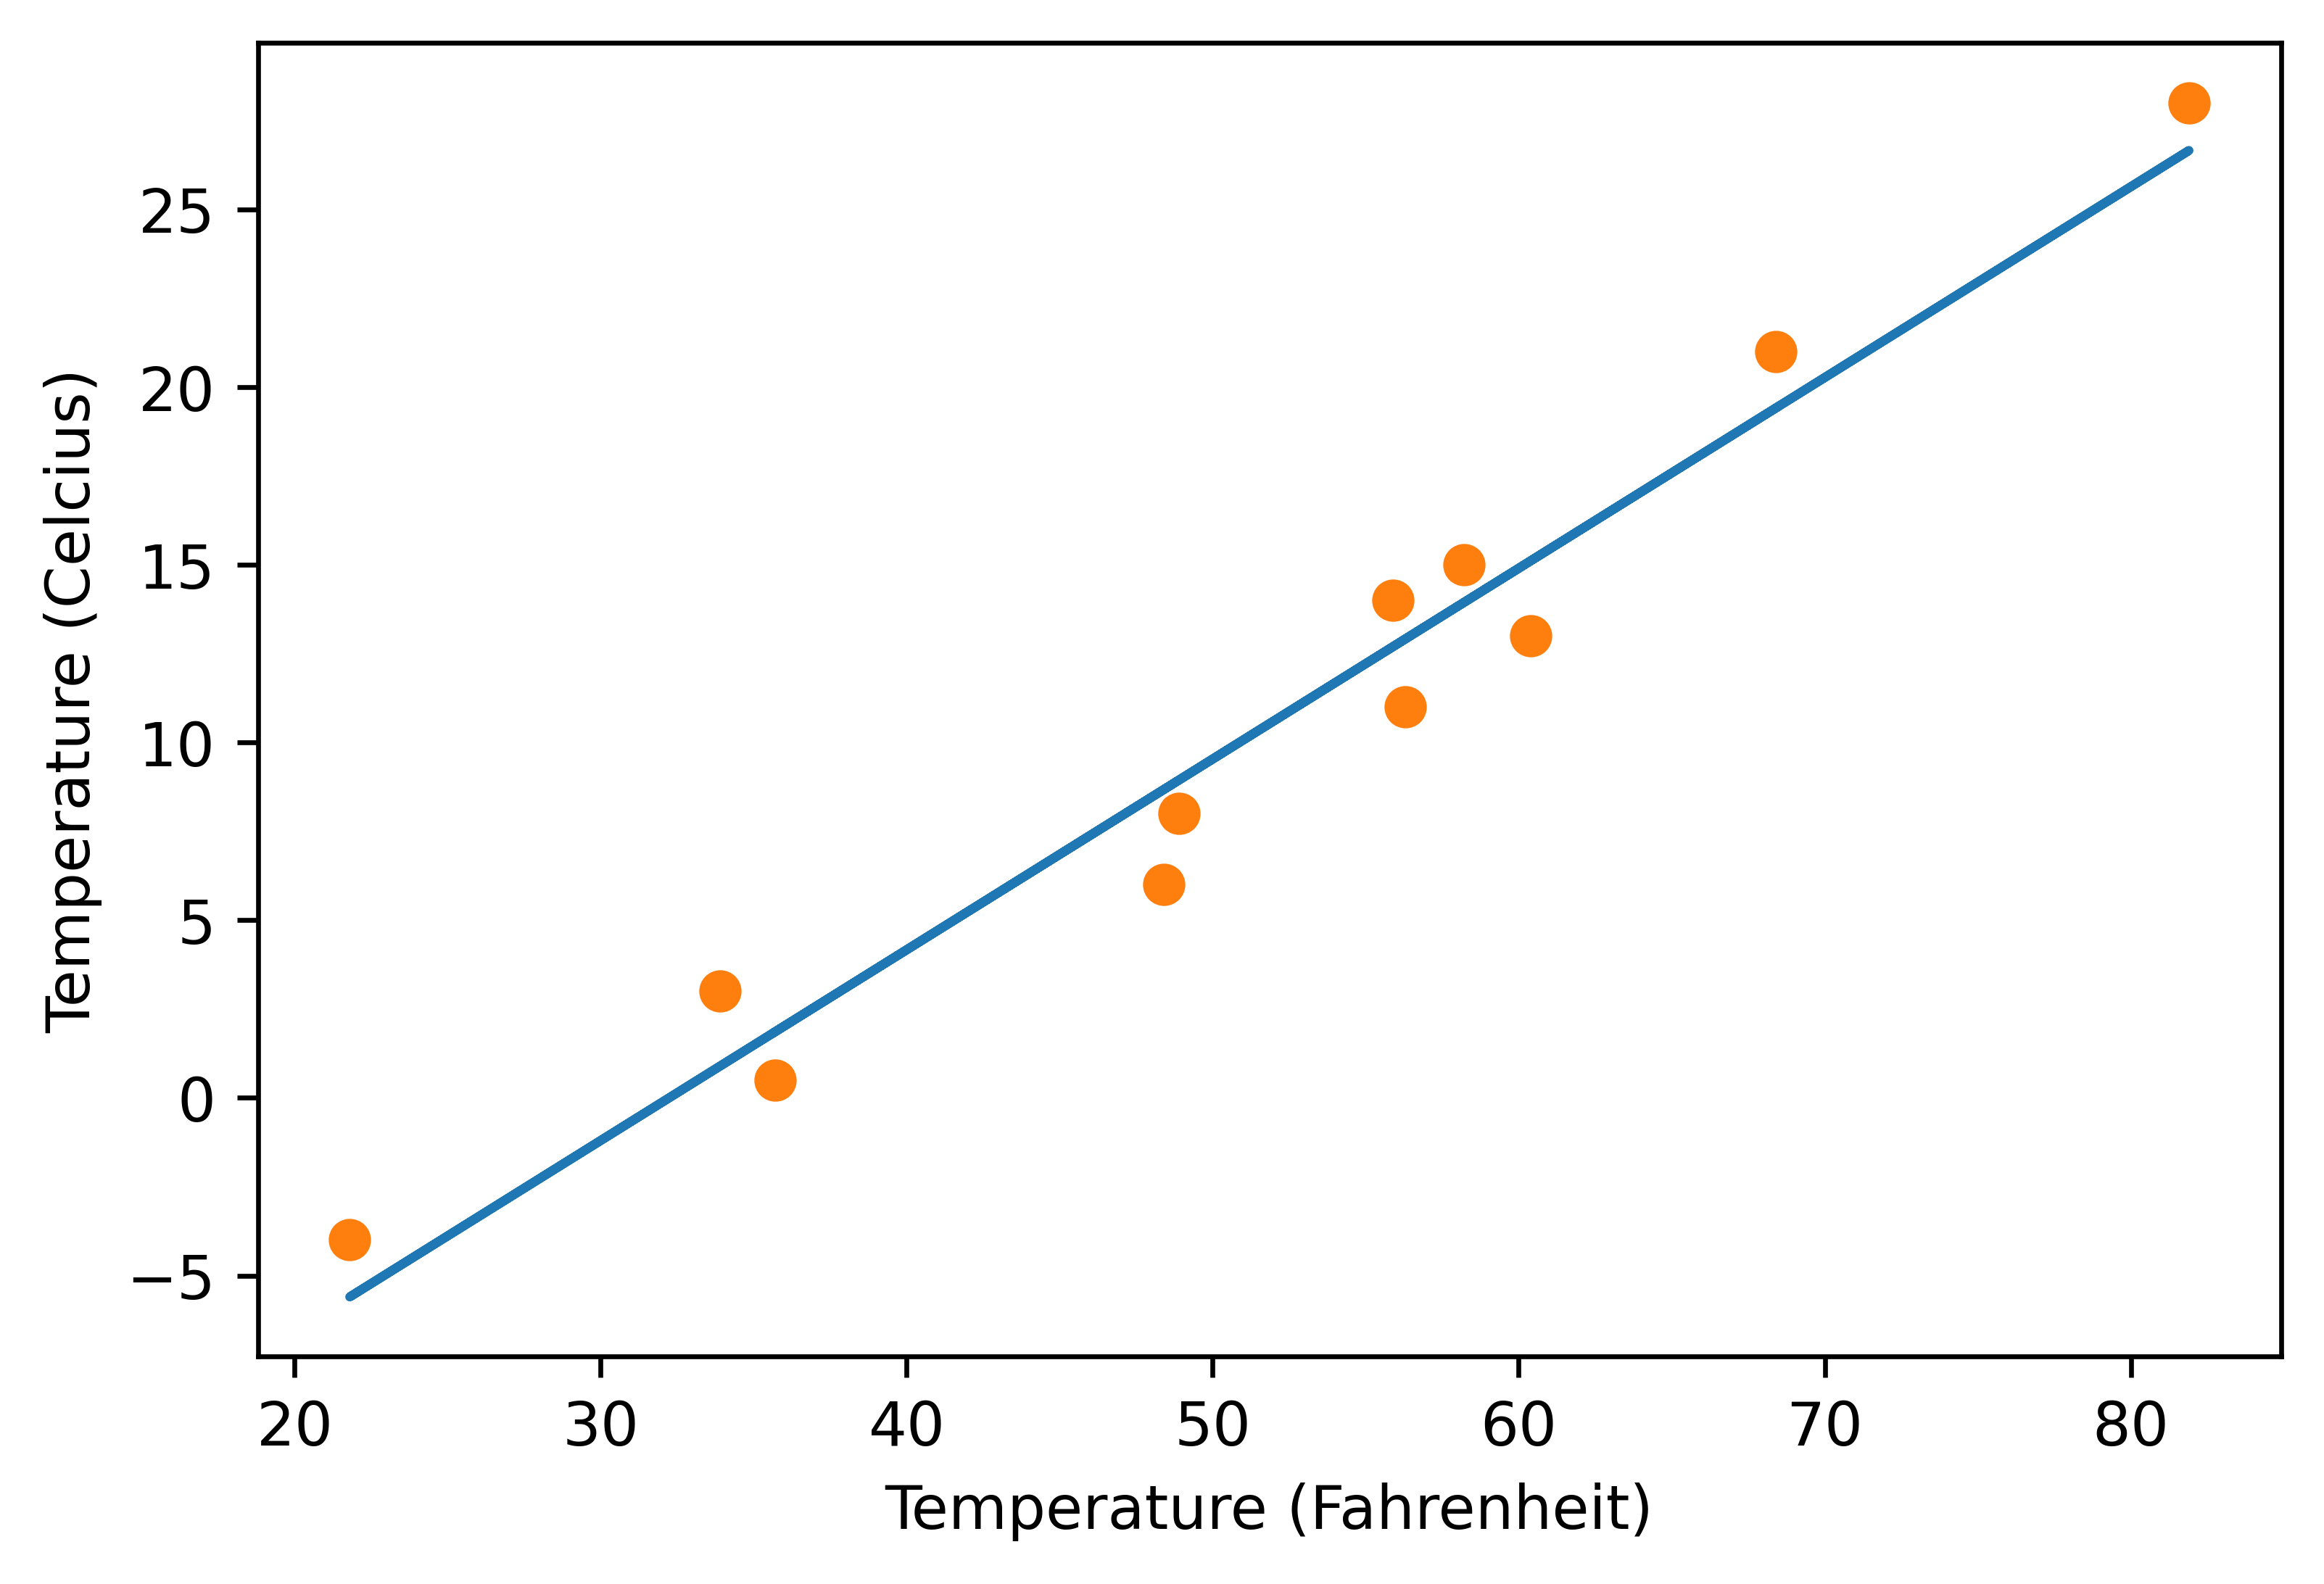

In [30]:
t_p = model(t_un, *params)
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celcius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

## Pytorch Autograd

In [31]:
params = torch.tensor([1.0, 0.0], requires_grad = True)

In [32]:
params.grad is None

True

In [33]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

In [34]:
params.grad

tensor([4517.2969,   82.6000])

In [35]:
if params.grad is not None:
    params.grad.zero_()

In [36]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        loss.backward()
        with torch.no_grad():
            params -= learning_rate * params.grad
        if epoch % 500 == 0:
            print("Epoch {0}, Loss {1}".format(epoch, float(loss)))
    return params

In [37]:
training_loop(n_epochs= 5000, learning_rate= 1e-2, params= torch.tensor([1.0, 0.0], requires_grad = True),
             t_u= t_un, t_c = t_c)

Epoch 500, Loss 7.860115051269531
Epoch 1000, Loss 3.828537940979004
Epoch 1500, Loss 3.092191219329834
Epoch 2000, Loss 2.957697868347168
Epoch 2500, Loss 2.933133840560913
Epoch 3000, Loss 2.9286484718322754
Epoch 3500, Loss 2.9278297424316406
Epoch 4000, Loss 2.9276793003082275
Epoch 4500, Loss 2.927651882171631
Epoch 5000, Loss 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [38]:
import torch.optim as optim

In [39]:
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [40]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-5

In [41]:
optimizer = optim.SGD([params], lr= learning_rate)

In [42]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

In [43]:
optimizer.step()

In [44]:
params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [48]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr= learning_rate)
t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad()
loss.backward()
optimizer.step()
params

tensor([1.7761, 0.1064], requires_grad=True)

In [51]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print("Epoch : {0}, Loss : {1}".format(epoch, float(loss)))
    return params

In [52]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr= learning_rate)

training_loop(n_epochs= 5000, optimizer= optimizer, params= params, t_u= t_un, t_c = t_c)

Epoch : 500, Loss : 7.860115051269531
Epoch : 1000, Loss : 3.828537940979004
Epoch : 1500, Loss : 3.092191219329834
Epoch : 2000, Loss : 2.957697868347168
Epoch : 2500, Loss : 2.933133840560913
Epoch : 3000, Loss : 2.9286484718322754
Epoch : 3500, Loss : 2.9278297424316406
Epoch : 4000, Loss : 2.9276793003082275
Epoch : 4500, Loss : 2.927651882171631
Epoch : 5000, Loss : 2.9276468753814697


tensor([  5.3671, -17.3012], requires_grad=True)

In [53]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr = learning_rate)

training_loop(n_epochs= 5000, optimizer= optimizer, params= params, t_u= t_u, t_c = t_c)

Epoch : 500, Loss : 7.612900257110596
Epoch : 1000, Loss : 3.086700439453125
Epoch : 1500, Loss : 2.928579092025757
Epoch : 2000, Loss : 2.9276442527770996
Epoch : 2500, Loss : 2.927645206451416
Epoch : 3000, Loss : 2.9276459217071533
Epoch : 3500, Loss : 2.927644968032837
Epoch : 4000, Loss : 2.927645683288574
Epoch : 4500, Loss : 2.9276463985443115
Epoch : 5000, Loss : 2.927645206451416


tensor([  0.5368, -17.3048], requires_grad=True)

In [54]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

In [55]:
shuffled_indices = torch.randperm(n_samples)

In [57]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [58]:
train_indices, val_indices

(tensor([ 5,  4,  1,  0,  3,  9,  2, 10,  8]), tensor([7, 6]))

In [60]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

In [61]:
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [62]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [65]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch%500 == 0:
            print("Epoch : {}, Training Loss : {:.4f}, Validation Loss : {:.4f}".format(
                epoch, float(train_loss.item()), float(val_loss.item())))
    return params

In [66]:
params = torch.tensor([1.0, 0.0], requires_grad = True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs= 3000, optimizer= optimizer, params= params, train_t_u= train_t_un, val_t_u= val_t_un,
             train_t_c= train_t_c, val_t_c= val_t_c)

Epoch : 1, Training Loss : 93.9626, Validation Loss : 19.1723
Epoch : 2, Training Loss : 30.0666, Validation Loss : 43.2793
Epoch : 3, Training Loss : 24.3541, Validation Loss : 53.7005
Epoch : 500, Training Loss : 11.1089, Validation Loss : 12.0315
Epoch : 1000, Training Loss : 5.6905, Validation Loss : 0.8164
Epoch : 1500, Training Loss : 3.3979, Validation Loss : 1.7388
Epoch : 2000, Training Loss : 2.4279, Validation Loss : 5.8157
Epoch : 2500, Training Loss : 2.0175, Validation Loss : 9.9387
Epoch : 3000, Training Loss : 1.8439, Validation Loss : 13.2430


tensor([  5.8612, -20.4629], requires_grad=True)

In [67]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs+1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
    return params

In [68]:
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss

In [70]:
def model_ex(t_u, w1, w2, b):
    return w2 * (t_u ** 2) + w1 * t_u + b

In [71]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u, train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model_ex(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = model_ex(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        if epoch <= 3 or epoch%500 == 0:
            print("Epoch : {}, Training Loss : {:.4f}, Validation Loss : {:.4f}".format(
                epoch, float(train_loss.item()), float(val_loss.item())))
    return params

In [81]:
params = torch.tensor([1.0,1.0, 0.0], requires_grad = True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr = learning_rate)

training_loop(n_epochs= 3000, optimizer= optimizer, params= params, train_t_u= train_t_un, val_t_u= val_t_un,
             train_t_c= train_t_c, val_t_c= val_t_c)

Epoch : 1, Training Loss : 797.0040, Validation Loss : 130.3509
Epoch : 2, Training Loss : 414.6111, Validation Loss : 92.5631
Epoch : 3, Training Loss : 218.0085, Validation Loss : 70.0476
Epoch : 500, Training Loss : 8.2312, Validation Loss : 25.4178
Epoch : 1000, Training Loss : 6.9187, Validation Loss : 21.6801
Epoch : 1500, Training Loss : 5.9365, Validation Loss : 18.7486
Epoch : 2000, Training Loss : 5.2013, Validation Loss : 16.4385
Epoch : 2500, Training Loss : 4.6509, Validation Loss : 14.6089
Epoch : 3000, Training Loss : 4.2389, Validation Loss : 13.1523


tensor([-0.2910,  0.4558, -0.4642], requires_grad=True)